### **DBSCAN (Density Based Spatial Clustering of Application with Noise):-**

DBSCAN is a density based clustering algorithm. It is an unsupervised machine learning algortihm which enables us to group similar data points together in the form of a cluster based on their densities.

There are some limitations of K-Means, which makes the need of an aternate clustering algorithm mandatory to overcome those limitations. Below are some limitations of K-Means:-

* **The no. of clusters is specified by the user:-**

  While applying K-Means the no. of clusters in which the data needs to be divided is decided by the user. While for 2-D data, we can guess the no. of clusters by plotting a scatter plot but for higher dimensional data, it becomes next to impossible.
  
  Though, there's an **Elbow Method**, to find the no. of clusters, but sometimes the WCSS (within Cluster Sum of Squared distance) is distributed in such a way, that the elbow point becomes diffciult to locate.

* **It is sensitive to outliers:-**

* Since K-Means is a **centroid based algorithm**, it is very sensitive to outliers. When a cluster is formed and the centroid of the cluster is found, due to presence of outliers the centroid get shifted from its obvious location ie. center of cluster to a new position which is not very obvious.

* **K-Means isn't effective in case of non-spherical distribution:-**

* K-Means doesn't give good results when applied on a non-spherical data

**What is density based clustering:-**
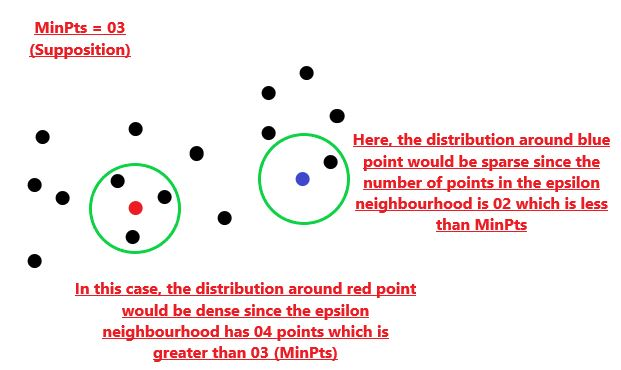
Density based clustering is a way in which we assume those points to be in one cluster, which are densely located in the space.

The data points which are sparsely located can form one or more clusters based on the level of sparsity.


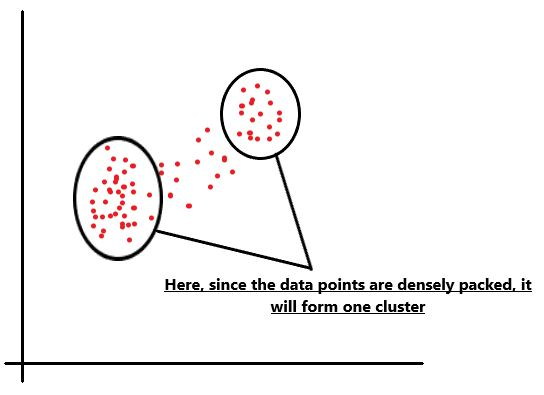

**MinPts and Epsilon:-**

These are the two hyperparameters of DBSCAN. If we vary these hyperparameters, our clustering may vary by significant amounts.

* We choose a datapoint

* We draw a circle of radius, epsilon around that data point

* Then, we check how many data points lie inside that circle.(The data point we chose in the first step is inclusive of this counting)

* If the number of points within the epsilon neighbourhood is greater than or equal to MinPts, we refer to the distribution as **dense** around that point.

* The distibution around that point would be referred as **sparse** if the number of points in the epsilon neighbourhood are less than MinPts.

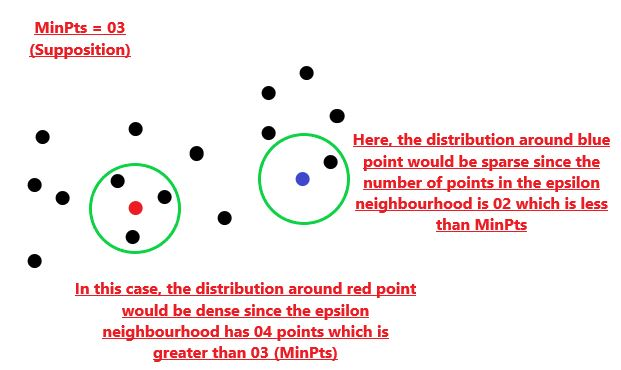

**Core Point, Border Point and Noise Point:-**

**Core Point:-**

  A point is said to be a core point if it has points greater than or equal to MinPts in its epsilon neighbourhood.

**Border Point:-**

  A point is said to be a border point if it has points less than MinPts but also a minimum of one core point.

**Noise Point:-**

  A point is said to be a noise point if it is nither Core nor Border ie. it has points less than MinPts in the epsilon neighbourhood and there is no core point in it.

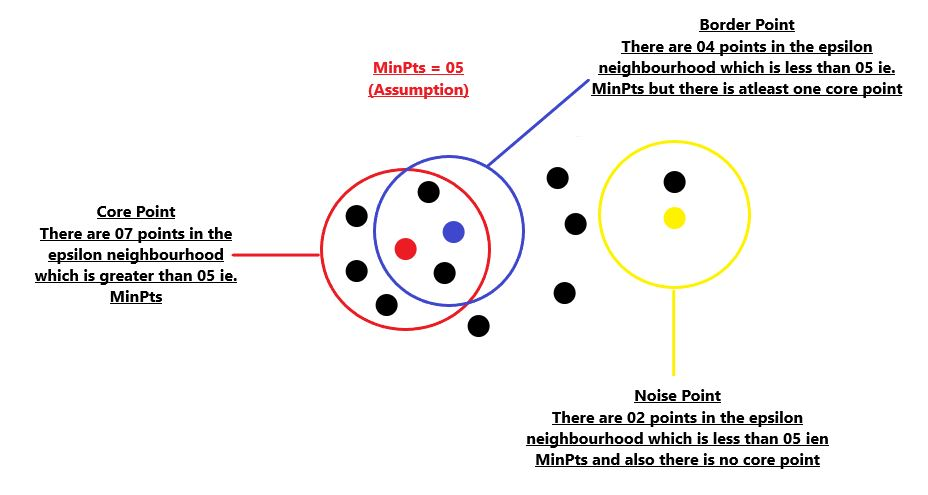

**Density Connected Points:-**

Two points are said to be in same cluster if they are density connected.

Two points are said to be **density connected** if they are connected indirectly by a sequence of **core points** and the distance between two adjacent core points is less than or equal to epsilon.

So, this criteria could fail in two conditions only:

* If any one among the sequence of points connecting two points say A and B, is not a core point.

* If the distance between any of the two adjacent core points is greater than epsilon.

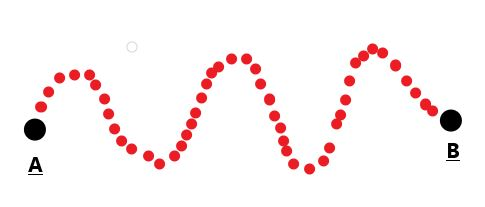

### **DBSCAN Algorithm:-**

**Step 01:** Choose your hyperparameters ie. MinPts and Epsilon

**Step 02:** Categorise all the data points in your data as core, border and noise points

**Step 03:** For all unclustered core points:

  **i)** Choose an unclustered core point

  **ii)** Create a new cluster around it

  **iii)** Add all points that are unclustered and density connected to this point in its cluster

**Step 04:** For each unclustered border point assign it to the cluster of nearest core point

**Step 05:** Leave all the noise points as it is

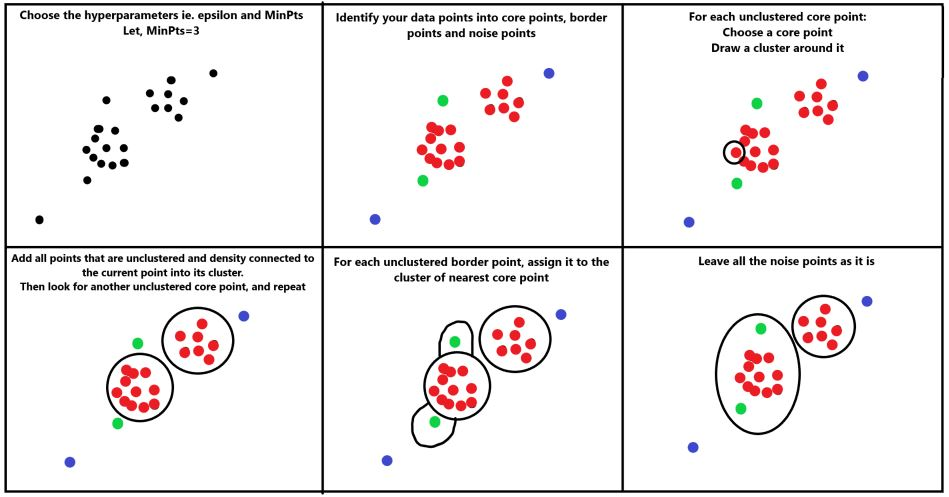

**Advantages of DBSCAN:**

* **Robust to outliers:**

  DBSCAN is robust to outliers as it classifies the outliers as noise points and doesn't assign any cluster to them.

  This is the reason why it can also be used for anomaly detection purposes.

* **No need to specifiy no. of clusters:**

  We don't have to specify the no. of clusters to DBSCAN algorithm which was the case with K-Means where we needed to specify the no. of clusers

* **It requires only 02 hyper-parameters to tune:**

  DBSCAN only requires two hyper-parameters which is not the case with other ML algorithms, which require large no. of hyper-parameters.

**Disadvantages of DBSCAN:**

* **Sensitivity to hyperparameters:**

  DBSCAN is very sensitive to hyperparamters, since a small change in hyperparameters can change the clustering output significantly.

* **Does not predict:**

  DBSCAN can only be used to train our model ie. after training if we give it a data point and tell it to put into one of the clusters, it's unable to do so.

**Visualization tool for DBSCAN:**
https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

**Code Implementation:-**

**i)** Import DBSCAN:

*from sklearn.cluster import DBSCAN**

**ii)** Initialize the DBSCAN model:

*dbscan=DBSCAN(eps=0.5,min_samples=10)*

**eps:** The maximum distance between two samples for them to be considered in the same neighbourhood

**min_samples:** The minimum number of samples in a neighbourhood for a point to be considered as a core point

**iii)** Fit the model to your data:

*dbscan.fit(data)*

**data:** A 2D array of your data points

**iv)** Get the cluster labels

*labels=dbscan.labels_

**labels:** A 1D array consisting of cluster label for each data point

**v)** Visualise the cluster

*plt.scatter(X[:,0],X[:,1],c=labels)*
*plt.show()*

**Note:** DBSCAN assigns a **-1** label for a noise point by default

In [ ]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [ ]:
#Creating a dummy dataset
X=np.array([[1,2],[2,2],[2,3],[8,7],[8,8],[25,80]])
print(X)

[[ 1  2]
 [ 2  2]
 [ 2  3]
 [ 8  7]
 [ 8  8]
 [25 80]]


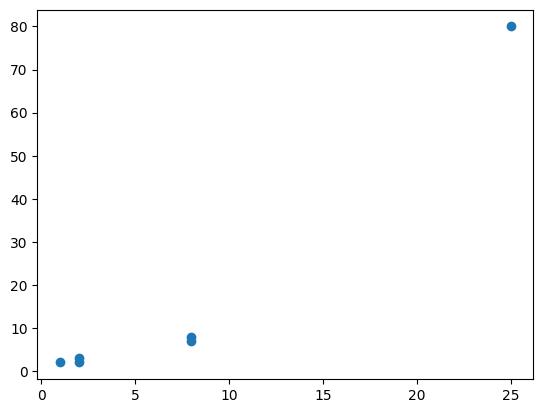

In [ ]:
#Plotting the raw data
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
#Initializing the DBSCAN model
dbscan=DBSCAN(eps=3,min_samples=2)

In [ ]:
#Fitting the model on our data and printing the labels
dbscan.fit(X)

DBSCAN(eps=3, min_samples=2)

In [ ]:
#Get the cluster labels
labels=dbscan.labels_
print(labels)

[ 0  0  0  1  1 -1]


These labels tell us that data point one, two and three have been assigned to a single cluster and data points four and five have been assigned to a different cluster whileas the sixth data point is a noise point.

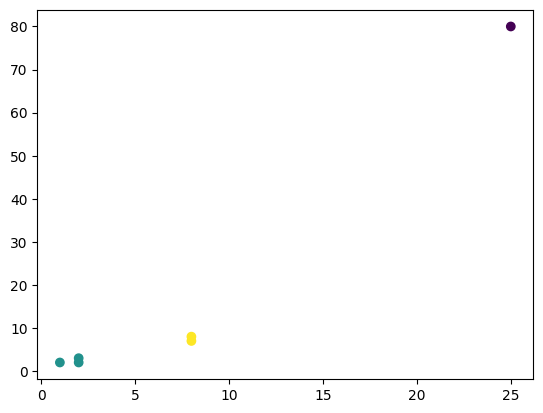

In [ ]:
#Visualize the clusters
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

In [ ]:
#Implementation on the iris dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#Applying PCA on iris dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(iris.iloc[:, 0:4])
x_pca = pca.transform(iris.iloc[:, 0:4])

In [ ]:
#Storing our reduced data into a new variable
X=x_pca

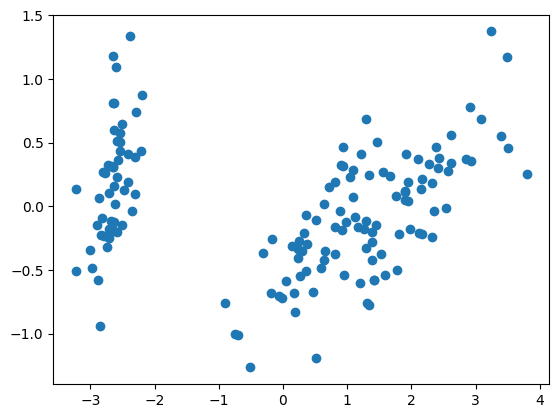

In [ ]:
#Visualizing the raw data
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
#Initializing our DBSCAN model
db=DBSCAN(eps=0.5,min_samples=3)

In [ ]:
#Fitting the model on our data
db.fit(X)

DBSCAN(min_samples=3)

In [ ]:
#Getting the cluster labels
labels=db.labels_

In [ ]:
#Number of clusters
print(f"No. of clusters: {len(set(labels))-(1 if -1 in set(labels) else 0)}")

No. of clusters: 3


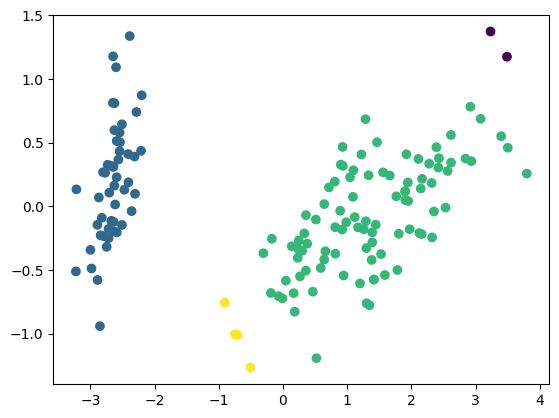

In [ ]:
#Visualizing the clusters
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

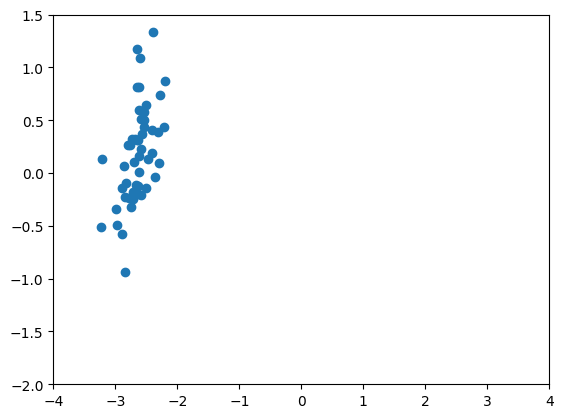

In [ ]:
#We can also use boolean indexing to extract the entries which belong to cluster 01 suppose:
X[labels==0]

#To visualize them
plt.scatter(X[labels==0][:,0],X[labels==0][:,1])
plt.xlim(-4,4)
plt.ylim(-2,1.5)
plt.show()